In [1]:
import copy

import numpy as np
import pandas as pd

# 1. About
- This Jupyter Lab notebook follow the tutorial in the official Pandas documentation.
- It is called "10 minutes to pandas".

# 2. Introduction (Object creation + Viewing data)

## 2.1 Example from the '10 minutes to pandas'

In [2]:
dates = pd.date_range("2013-01-01", periods=6)

df1: pd.DataFrame = pd.DataFrame(data=np.random.randn(6, 4),
                                 index=dates,
                                 columns=['A', 'B', 'C', 'D'])

df1

,A,B,C,D
2013-01-01,0.276059,1.631608,-0.411694,-0.837094
2013-01-02,-0.538334,-0.662998,0.311124,-0.706487
2013-01-03,0.618913,0.636513,-0.081085,-0.983302
2013-01-04,0.483804,-0.871470,-2.200646,1.445253
2013-01-05,0.728478,0.438622,-0.311934,-1.284049
2013-01-06,0.809170,2.698371,0.576049,0.123526


In [3]:
np.random.randn(6, 4)

array([[ 0.76994864,  0.25528971, -2.53591554, -0.46510687],
       [-0.7399456 ,  0.23964125, -1.10762804, -0.19783881],
       [ 0.43495194, -1.60152558, -1.18695504,  0.05297793],
       [-1.0930374 , -0.19258587,  1.15821687, -2.30368619],
       [-1.23884204, -0.30966247, -1.29782629, -0.84416682],
       [-0.59868072, -0.79606605,  0.67172837,  0.98262978]])

In [4]:
list("ABCD")

['A', 'B', 'C', 'D']

In [5]:
df2: pd.DataFrame = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


## 2.2 Grades example

In [6]:
# Series example.
# Nan != NA, but Pandas uses them interchangeably.

ser = pd.Series([1, 3, 5, np.nan, 6, 8], dtype=np.float64)
ser

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [7]:
# Series
# Numpy's dtypes are automatically inferred.

names_list:      list[str]  = ["Anna", "Mary", "Lucy", "Zoe"]
grades_list:     list[int]  = [7, 9 , 8, 4]
wants_dual_list: list[bool] = [False, True, False, True]

ser: pd.Series = pd.Series(index=names_list, data=grades_list)
ser

Anna    7
Mary    9
Lucy    8
Zoe     4
dtype: int64

In [8]:
# DataFrames

# DataFrames are built in columns.
# Column names are the keys of the data dictionary.
# Numpy's dtypes are automatically inferred.

data: dict[str, list] = {"grade":      grades_list,
                         "wants_dual": wants_dual_list}

students: pd.DataFrame = pd.DataFrame(index = names_list,
                                      data  = data)
students

,grade,wants_dual
Anna,7,False
Mary,9,True
Lucy,8,False
Zoe,4,True


In [9]:
# Shows only the first or the last rows
students.head(2)
students.tail(2)

# Retrieve the index (row names) and the columns (column names)
# BEWARE! No functions here. They are attributes!
print(type(students.index))
print(type(students.columns))

# Transpose
# BEWARE! Not a function. It's an attribute!
students.T

# Sorting indexes
sorted_students = students.sort_index(axis=0, ascending=False)
sorted_students

# Sorting values
sorted_grades = students.sort_values(by="grade",
                                     axis=0,
                                     ascending=False)
sorted_grades

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.base.Index'>


,grade,wants_dual
Mary,9,True
Lucy,8,False
Anna,7,False
Zoe,4,True


# 3. Selection

In [10]:
# Selection

# Use always .loc.
# .loc is an attribute!
# .loc receives two parameters: ["zambullirse", "bucear"]
students
students.loc["Lucy", "grade"]
students.loc["Lucy", ["grade", "wants_dual"]]
students.loc["Lucy", :]

students.loc[:, "grade"]



Anna    7
Mary    9
Lucy    8
Zoe     4
Name: grade, dtype: int64

In [11]:
# .loc examples
students.loc["Lucy" , "grade"]
students.loc["Anna" , "wants_dual"]

# iloc examples
students.iloc[ 3 , 0] # Zoe's grade
students.iloc[-1 , 0] # Zoe's grade

# at examples
students.at["Lucy" , "grade"]

# iat example 
students.iat[ 3 , 0] # Zoe's grade


4

In [12]:
# Use preferently .loc[]
# .at[] is only an optimization. Returns always a single value.
# .loc[] can return multiple values

students.loc[ ["Mary", "Lucy"] ,
               "grade"]

students.loc[ ["Mary", "Lucy"],
              ["grade", "wants_dual"] ]

students.loc[ ["Anna", "Mary", "Lucy", "Zoe"],
              ["grade"] ]

students.loc[ students.index,
              ["grade"] ]

students.loc[ :, ["grade"] ]

students.loc[ :, : ]

students.loc[ "Anna":"Lucy", : ]  # Slices INCLUDE THE LAST LABEL!

students1: pd.DataFrame = students.loc["Anna":"Mary", :]
students2: pd.DataFrame = students.loc["Lucy":"Zoe", :]


In [13]:
# Masks
# Mask = Object that hides the information we don't want.

pass_mask: pd.Series = (students.loc[ : , "grade"] >= 5)
students.loc[pass_mask , :]

students.loc[ ["Anna", "Mary", "Lucy"] , :]
students.loc[ [True, True, True, False] , :]

students

,grade,wants_dual
Anna,7,False
Mary,9,True
Lucy,8,False
Zoe,4,True


# 4. Missing data

In [14]:
# Read Scimago ranking
entries: pd.DataFrame = pd.read_csv("scimago-medicine.csv", sep=";")

# Count entries with H-Index >= 100
h_index_mask        = (entries.loc[: , "H index"] >= 100)
h_index_100_entries = entries.loc[h_index_mask, :]
len(h_index_100_entries)

# Show top 5 entries with the highest H index
sorted_entries = entries.sort_values(by="H index",
                                     axis=0,
                                     ascending=False)
sorted_entries.head(5)

# Edit the entries with a mask
entries2 = copy.deepcopy(entries)

bad_entries_mask = (entries2.loc[: , "H index"] < 1000)
entries2.loc[bad_entries_mask, "H index"] = 0

# Transform values
entries3 = copy.deepcopy(entries)
entries3.loc[:, "H index"] = -1 * entries3.loc[:, "H index"]

entries3.sort_values(by="H index",
                     axis=0,
                     ascending=True).head()

# Clean NAs
entries4 = copy.deepcopy(entries)

entries4.loc[:, "Publisher"].isnull().value_counts()

null_publisher_mask = entries4.loc[:, "Publisher"].isnull()

entries4.loc[null_publisher_mask, "Publisher"] = np.nan

entries4.iloc[644, :]  # Example of row with NA


# Manage NAs
entries5 = copy.deepcopy(entries4)
entries5.loc[:, "Publisher"].fillna(value="Unknown Publisher", inplace=True)
entries5.iloc[644, :]

ser1: pd.Series = pd.Series([0, 1, np.nan, 3])
ser1.dropna()

0    0.0
1    1.0
3    3.0
dtype: float64

# 5. Operations (Apply, etc.)

In [15]:
# Map, ApplyMap, Apply

# How to remember these functions
# 1. apply() works element-wise on Series and column/row-wise on DFs.
# 2. applymap() works element-wise on DFs.
# 3. map() is just more flexible than apply() on Series (accepts dicts)


# 1. Series.map() and Series.apply(). Both work element-wise.
ser2: pd.Series = pd.Series([0, 1, 2, 3])
ser2.map(lambda x: x*2)

ser3: pd.Series = pd.Series(["Anna", "Mary", "Lucy", "Zoe"])
ser3.map(lambda x: "Hello " + x)

# 2. DataFrame.applymap(). Works element-wise.
data = {"A": [1, 2],
        "B": [3, 4] }

df3 = pd.DataFrame(data)
df3.applymap(lambda x: x*2)

# 3. DataFrame.apply(). Works column-wise.
data = {"A": [1, 2],
        "B": [3, 4] }

df3.apply(lambda column: column.sum())



# How to make new columns of data
df4 = copy.deepcopy(df3)
df4.loc[:, "X"] = df3.B.map(lambda x: x*2)
df4

# Reordering columns manually (there are better methods)
df5 = df4.loc[:, ["A", "X", "B"]]
df5


,A,X,B
0,1,6,3
1,2,8,4


# 6. Merge

In [16]:
# SQL-Like Joins

# Let's split the grades into a separate dataframe
student_grades: pd.DataFrame = copy.deepcopy(students)
# student_grades.index.name = "name"
student_grades.reset_index(inplace=True)
student_grades.drop(columns="wants_dual", inplace=True)
student_grades.rename(columns={"index": "name"}, inplace=True)
student_grades = student_grades.loc[:, ["grade", "name"] ]
student_grades


,grade,name
0,7,Anna
1,9,Mary
2,8,Lucy
3,4,Zoe


In [17]:
# SQL-Like Joins

# Split the dataframe and join it later
student_grades: pd.DataFrame = (students
                                .reset_index()
                                .rename(columns={"index": "name"})
                                .drop(columns="wants_dual")
                                .loc[:, ["name", "grade"]]
)

student_duals:  pd.DataFrame = (students
                                .reset_index()
                                .rename(columns={"index": "name"})
                                .drop(columns="grade")
                                .loc[:, ["name", "wants_dual"]]
)

merged_students: pd.DataFrame = ( pd.merge(student_grades, student_duals, on="name")
                                    .set_index("name")
)

merged_students.index.name = None
merged_students



,grade,wants_dual
Anna,7,False
Mary,9,True
Lucy,8,False
Zoe,4,True


# 7. Group By
(Improved example from the '10 minutes to pandas')

In [18]:
# Group By

df3 = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
    }
)

# Group by a single column and sum each group
df3_grouped = df3.groupby("A")
df3_sum = df3_grouped.sum()
df3_sum


# Verify manually that the grouping worked

# Check dictionary of groups
df3_groups = df3_grouped.groups
df3_groups

# Get each group labels
foo_rows = df3_groups['foo']
bar_rows = df3_groups['bar']

# Sum the C column for each group
df3_foo_c_sum = df3.loc[foo_rows, "C"].sum()
df3_bar_c_sum = df3.loc[bar_rows, "C"].sum()

# Compare values
print('bar:', df3_bar_c_sum)
print('foo:', df3_foo_c_sum)

print(df3_sum)


# 'Ungroup' to access the original dataframe: Filter by True!
# https://www.py4u.net/discuss/141899
df3_ungrouped = df3_grouped.filter(lambda group_df: True)
print(type(df3_ungrouped))
df3_ungrouped

bar: -2.224068755364976
foo: 0.45422077936635363
            C
A            
bar -2.224069
foo  0.454221
<class 'pandas.core.frame.DataFrame'>


,A,B,C
0,foo,one,1.045079
1,bar,one,-1.605560
2,foo,two,-0.909896
3,bar,three,-0.051453
4,foo,two,-1.776869
5,bar,two,-0.567056
6,foo,one,2.659938
7,foo,three,-0.564032


# 8. Categoricals

In [19]:
# Categoricals (v1)

# Create a new column
students.loc[:, "cat_grade"] = ["Notable", "Excelente", "Notable", "Insuficiente"]

students.loc[:, "cat_grade"] = students.loc[:, "cat_grade"].astype("category")
students.dtypes

# Write categoricals in the same order as their numeric equivalents
cat_grades: list[str] = ["Insuficiente", "Suficiente", "Bien", "Notable", "Excelente"]
students.loc[:, "cat_grade"] = students.loc[:, "cat_grade"].cat.set_categories(cat_grades)
students.loc[:, "cat_grade"]

students.sort_values(by=["cat_grade", "grade"], ascending=False)


,grade,wants_dual,cat_grade
Mary,9,True,Excelente
Lucy,8,False,Notable
Anna,7,False,Notable
Zoe,4,True,Insuficiente


In [20]:
# Categoricals (v2, uses .apply() )

# Generate categoricals from their numeric equivalents with a function
# In Python 3.10 use match+case
def get_categorical_grade(grade: int) -> str:

    result: str

    if 0 <= grade <= 4:
        result = "Insuficiente"
    elif grade == 5:
        result = "Suficiente"
    elif grade == 6:
        result = "Bien"
    elif 7 <= grade <= 8:
        result = "Notable"
    elif 9 <= grade <= 10:
        result = "Excelente"
    else:
        result = "Error!"

    return result


# Create a new column of categorical values
numerical_grades:   pd.Series = students.loc[:, "grade"]
categorical_grades: pd.Series = numerical_grades.apply(get_categorical_grade)
students.loc[:, "cat_grade"]  = categorical_grades

# Convert to Category dtype
students.loc[:, "cat_grade"] = students.loc[:, "cat_grade"].astype("category")

# Set all categories to the type
all_categorical_grades = ["Insuficiente", "Suficiente", "Bien", "Notable", "Excelente"]
students.loc[:, "cat_grade"] = students.loc[:, "cat_grade"].cat.set_categories(all_categorical_grades)
students.loc[:, "cat_grade"]

students.sort_values(by=["cat_grade", "grade"], ascending=False)

,grade,wants_dual,cat_grade
Mary,9,True,Excelente
Lucy,8,False,Notable
Anna,7,False,Notable
Zoe,4,True,Insuficiente


In [21]:
# Categoricals (v3, uses method chaining, unique() and simplifies the function used on .apply() )

# Generate categoricals from their numeric equivalents with a function
numerical_grades:   list[int] = list(range(0,11))
categorical_grades: list[str] = ["Insuficiente", "Insuficiente", "Insuficiente", "Insuficiente", "Insuficiente",
                                 "Suficiente",
                                 "Bien",
                                 "Notable", "Notable",
                                 "Excelente", "Excelente",
                                ]
num_cat_grades: pd.Series = pd.Series(index=numerical_grades, data=categorical_grades)

# Function that will use num_cat_grades to convert grades from numerical to categorical
def get_categorical_grade(grade: int) -> str:
    return num_cat_grades[grade]

# List of categories in their ascending order. unique() preserves order, unlike sets!
unique_cat_grades: np.ndarray = num_cat_grades.unique()

# Create a new column, assign categorical values, convert dytpe, set all possible categories
students.loc[:, "cat_grade"] = (students.loc[:, "grade"]
                                .apply(get_categorical_grade)
                                .astype("category")
                                .cat.set_categories(unique_cat_grades)
)

# Sort returns a new DataFrame
students.sort_values(by=["cat_grade", "grade"], ascending=False)


,grade,wants_dual,cat_grade
Mary,9,True,Excelente
Lucy,8,False,Notable
Anna,7,False,Notable
Zoe,4,True,Insuficiente


In [22]:
# Categoricals (v4, the easiest to read. Uses .map() and a Series as a dict)

# Write all correspondences in an easy-to-read way.
correspondences: list[tuple[int, str]] = [
    ( 0, "Insuficient"),
    ( 1, "Insuficient"),
    ( 2, "Insuficient"),
    ( 3, "Insuficient"),
    ( 4, "Insuficient"),
    ( 5, "Suficient"),
    ( 6, "Bé"),
    ( 7, "Notable"),
    ( 8, "Notable"),
    ( 9, "Exceŀlent"),
    (10, "Exceŀlent"),
]

# Put the correspondences in a Series, not a dict. We need Series.unique()
numerical_grades:   list[int] = [item[0] for item in correspondences]
categorical_grades: list[str] = [item[1] for item in correspondences]
num_cat_grades:     pd.Series = pd.Series(index=numerical_grades, data=categorical_grades)

# List of categories in their ascending order. unique() preserves order, unlike sets!
unique_cat_grades: np.ndarray = num_cat_grades.unique()

# Instead of .apply() we can use .map() directly using a dict or a Series.
students.loc[:, "cat_grade"] = (students.loc[:, "grade"]
                                .map(num_cat_grades)
                                .astype("category")
                                .cat.set_categories(unique_cat_grades)
)

# Sort returns a new DataFrame
students.sort_values(by=["cat_grade", "grade"], ascending=False)

,grade,wants_dual,cat_grade
Mary,9,True,Exceŀlent
Lucy,8,False,Notable
Anna,7,False,Notable
Zoe,4,True,Insuficient


# 9. Plotting

<AxesSubplot:>

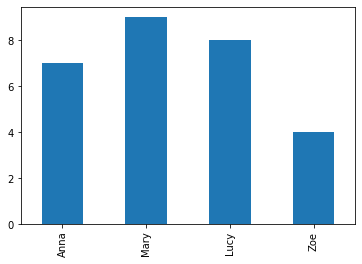

In [23]:
# Plotting

# Discrete vars -> Use bar chart.
students.loc[:, "grade"].plot(kind="bar")


<AxesSubplot:>

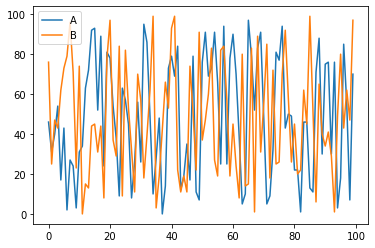

In [24]:
# Plotting

# Continous vars example.

# Make a DataFrame with two columns.
# Each column will have 100 random values (ints).
# Values will range from 0 to 100.

min_value: int = 0
max_value: int = 100
size:      int = 100

a_data: np.array = np.random.randint(min_value, max_value, size=size)
b_data: np.array = np.random.randint(min_value, max_value, size=size)

data = {"A": a_data, "B": b_data}
random_df = pd.DataFrame(data=data) # Default index: 0..99
random_df.plot()